In [2]:
% load_ext autoreload
% autoreload 2

import sys
import logging
logging.basicConfig(stream=sys.stdout, level=logging.getLevelName('DEBUG'))


## Models

In [3]:
% env MKL_THREADING_LAYER=GNU
from neural_metrics.models.nlp import ActivationsWorker

models = ['skip-thoughts', 'lm_1b']
models = {model: ActivationsWorker(model) for model in models}


env: MKL_THREADING_LAYER=GNU


/home/martin/miniconda3/envs/neural-nlp/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Using TensorFlow backend.


DEBUG:ActivationsWorker:Creating model


Loading model parameters...


Compiling encoders...


Loading tables...


Packing up...
DEBUG:neural_metrics.utils.StorageCache:Loading from storage: /mnt/c/Users/Martin/workspaces/tenenbaum/neural-nlp/output/skip-thoughts-weights_True-activations.pkl


DEBUG:ActivationsWorker:Creating model


Recovering graph.


INFO:tensorflow:Recovering Graph ressources/lm_1b/graph-2016-09-10.pbtxt


Recovering checkpoint ressources/lm_1b/ckpt-*


DEBUG:neural_metrics.utils.StorageCache:Loading from storage: /mnt/c/Users/Martin/workspaces/tenenbaum/neural-nlp/output/lm_1b-weights_True-activations.pkl


## Diverse

In [20]:
% matplotlib inline

import seaborn
from matplotlib import pyplot

from neural_metrics.data.nlp import data_mappings
from neural_metrics.metrics.physiology.similarity import rsa


def plot_diverse_rsa(dataset_name):
    data = data_mappings[dataset_name]()
    fig, axes = pyplot.subplots(1, len(models), figsize=(12, 4))
    for i, (model_name, activations_worker) in enumerate(models.items()):
        ax = axes[i]
        print(model_name)
        ax.set_title(model_name)
        encodings = activations_worker(dataset_name)  # feed in sentences in context, i.e. with continuity
        similarities = rsa(encodings)
        seaborn.heatmap(similarities, ax=ax)
        ax.set_xticklabels(data)
        ax.get_yaxis().set_visible(False)
    pyplot.savefig('results/RSA-{}.svg'.format(dataset_name))
    pyplot.savefig('results/RSA-{}.png'.format(dataset_name))
    fig.show()


### 1

skip-thoughts


lm_1b


/home/martin/miniconda3/envs/neural-nlp/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


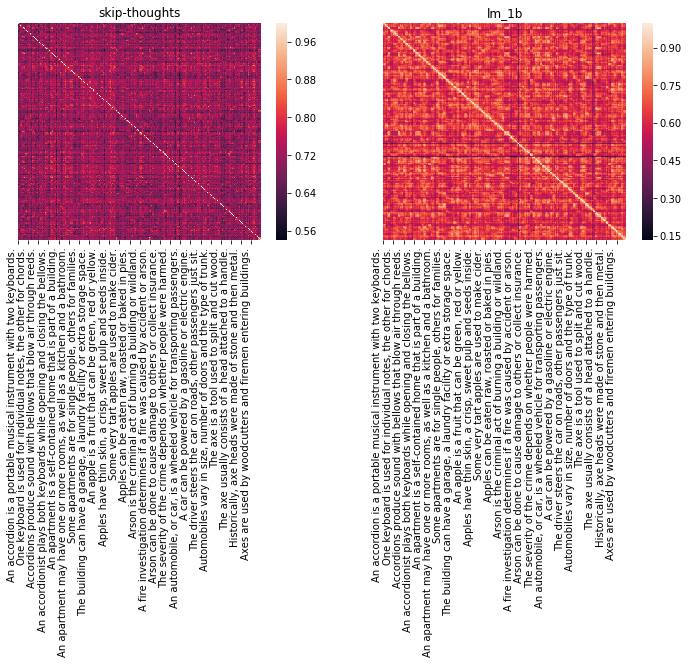

In [21]:
plot_diverse_rsa('diverse1')